# TITANIC DATASET CLASSIFICATION PROJECT

## Project structure

1. Intro to the problem - problem definition
2. Get the data (clone the repo)
3. Imports (import libraries)
4. Basic data description
5. EDA
6. Missing values
7. feature preparation and engineering
    - 7.1 Create a new feature
    - 7.2 Convert categorical features to dummy variables
    - 7.3 Train-test split
    - 7.4 Normalize continuous data
8. Train model
9. Evaluate model - choose 1-3 metrics and evaluate the model
10. Project summary and possible (future) improvements
11. Push to Github

## Problem definition
* We want to create a model for the prediction of whether a given person will survive or not based on their features like age, gender, ticket class, number of siblings, parents, spouse...
* https://www.kaggle.com/competitions/titanic/data

## Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as ttt
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

## Import the data

In [2]:
titanic = pd.read_csv("titanic.csv")

## Basic data description and inspection

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Above we see that we have one dependent variable **Survived**.
* Our predictors are:
    * Pclass (ticket class)
    * Name
    * Sex
    * Age
    * SibSp (number of siblings/spouses)
    * Parch (number of parents/children)
    * Ticket
    * Fare
    * Cabin
    * Embarked (town)<br>

**For the purpose of simplicity we will focus only on numerical/categorical data and ignore the text data like Name and Ticket**

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can already see that Age has quite a lot of missing values so we will want to do something about that

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Above we have the data types of the columns in our dataframe so that we can reference it later should we need it

## Exploratory Data Analysis

### let's plot the variables we want to use

#### Here are the plots of our predictors:

<AxesSubplot:xlabel='Age', ylabel='Count'>

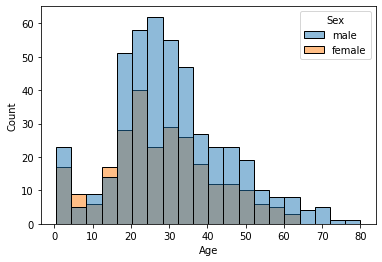

In [6]:
sns.histplot(data=titanic, hue="Sex", x="Age")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

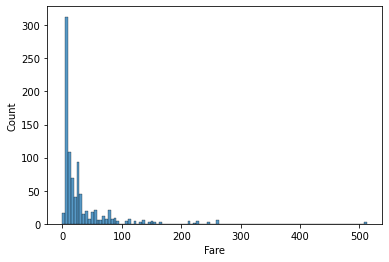

In [7]:
sns.histplot(data=titanic, x="Fare")

<AxesSubplot:xlabel='Parch', ylabel='Count'>

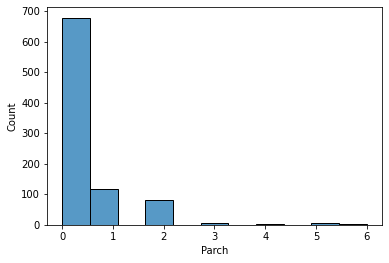

In [8]:
sns.histplot(data=titanic, x="Parch")

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

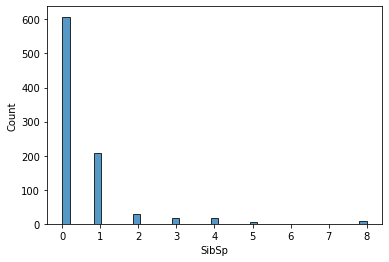

In [9]:
sns.histplot(data=titanic, x="SibSp")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

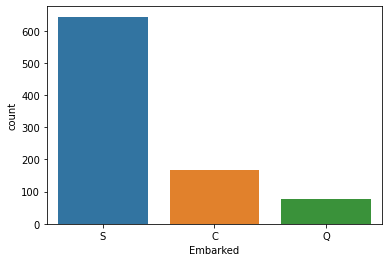

In [10]:
sns.countplot(data=titanic, x="Embarked")

#### Here is a countplot for our dependent variables - Survived

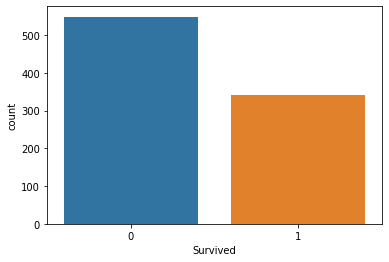

In [11]:
sns.countplot(x="Survived", data=titanic);

#### Now let's plot some relationships between our predictors and dependent variable - Survived

C:\Users\Rnowa\anaconda3\envs\SDA_DASCI\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


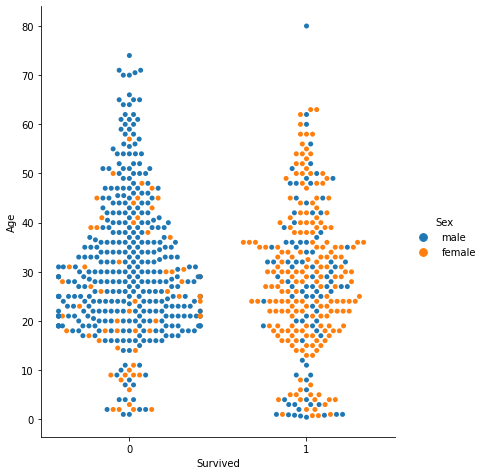

In [12]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=titanic, kind="swarm")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

above we can see that it is mostly women that have survived

C:\Users\Rnowa\anaconda3\envs\SDA_DASCI\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


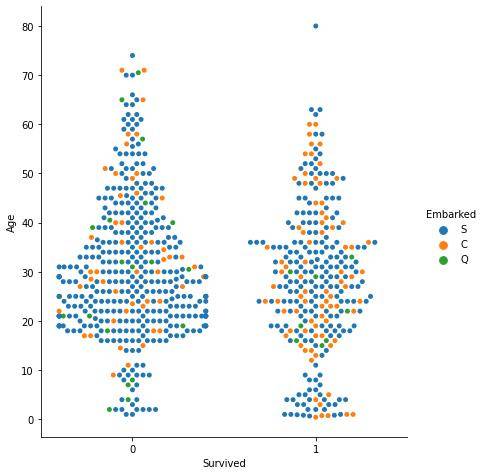

In [13]:
sns.catplot(x="Survived", y="Age", hue="Embarked", data=titanic, kind="swarm")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

above we can see that there is more people from Cherbourg that have survived than not

## Data Cleaning / wrangling

In [14]:
# fill the two missing values in the Embarked column
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [15]:
# there are 177 missing values in the Age column
titanic["Age"].isnull().sum()

177

In [16]:
# so let's interpolate the missing values in our Age column by using the .interpolate() method [this is a bit of an experimental feature]
titanic["Age"] = titanic["Age"].interpolate(method="pad", limit=30)
# the problem is that we might get a person who is supposed to be a child as a 60 year old. This could be a problem in some cases

#### Let's encode categorical variables with numbers

In [17]:
# lets encode female = 1 and male = 0
gender_mapping = {"female": 1, "male": 0}
titanic["Sex"] = titanic["Sex"].apply(lambda x: gender_mapping[x])
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# lets encode the embarked column C = Cherbourg = 1, Q = Queenstown = 2, S = Southampton = 3
embarked_mapping = {"C": 1, "Q": 2, "S": 3}
titanic["Embarked"] = titanic["Embarked"].apply(lambda x: embarked_mapping[x])
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3


## Feature preparation and engineering

### Let's make a new dataframe with the data that we will actually use in the mode

In [19]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### We only take the numerical and categorical variables and ignore text data for now

In [20]:
titanic_clean = pd.DataFrame(titanic[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

In [21]:
# This is the dataframe we will use for our models
titanic_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3


## Train-test split

### We use 80% of our data for training and 20% for model validation

In [22]:
x = titanic_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_clean['Survived']

# for presentation purposes let's use the output of the split with stratify
X_train, X_test, y_train, y_test = ttt(x, y, test_size=0.20, shuffle=True, stratify=y, random_state=42)

#### Let's see how the *stratify* parameter works in the train_test_split() method

In [23]:
# with stratify
print(f"count for stratify y_train:\n{y_train.value_counts()}")
print(f"count for stratify y_test:\n{y_test.value_counts()}")


count for stratify y_train:
0    439
1    273
Name: Survived, dtype: int64
count for stratify y_test:
0    110
1     69
Name: Survived, dtype: int64


In [24]:
x_t = titanic_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_t = titanic_clean['Survived']

X_train_t, X_test_t, y_train_t, y_test_t = ttt(x, y, test_size=0.20, shuffle=True, random_state=42)

In [25]:
# without stratify
print(f"count for non-stratify y_train:\n{y_train_t.value_counts()}")
print(f"count for non-stratify y_test:\n{y_test_t.value_counts()}")

count for non-stratify y_train:
0    444
1    268
Name: Survived, dtype: int64
count for non-stratify y_test:
0    105
1     74
Name: Survived, dtype: int64


We can see that it does not change the distribution in our dependent variable between the splits. We would have to check if the differences are statisticall significant but let us ignore that for now.

## Train the models

#### Random forrest classifier

In [26]:
rfc_classifier = rfc()
rfc_classifier.fit(X_train, y_train)

# then lets get the predictions for our test split
pred = rfc_classifier.predict(X_test)

## Model evaluation

In [27]:
# these are the function we will use to calculate and print the metrics to validate a model we train
def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

#### Metrics for the validation of our Random Forest Clasiffier model:

In [28]:
print_results(calculate_metrics(y_test, pred), 'rfc')

Results for rfc
----
  Accuracy:  0.7988826815642458
  Precision: 0.7972808761796547
  Recall:    0.7988826815642458
  F1 score:  0.7953986519310178
  Mislabeled 36 out of 179




below we can see which feature are most important in our model
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

In [29]:
columns = list(titanic_clean.columns)
columns.remove("Survived")

feature_importances = dict(zip(columns, rfc_classifier.feature_importances_))
dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

{'Fare': 0.269184950141229,
 'Age': 0.26362640724688036,
 'Sex': 0.2479477905202539,
 'Pclass': 0.09016280894643611,
 'SibSp': 0.05112808629867263,
 'Parch': 0.04228944289525751,
 'Embarked': 0.035660513951270546}

### Let's train another Random Forrest Classifier with only the three most important features

In [30]:
titanic_clean_imp = pd.DataFrame(titanic[['Sex', 'Age', 'Fare']])
x_imp = titanic_clean_imp
y_imp = titanic_clean['Survived']

X_train_imp, X_test_imp, y_train_imp, y_test_imp = ttt(x_imp, y_imp, test_size=0.20, random_state=11, shuffle=True, stratify=y_imp)

In [31]:
rfc_classifier_imp = rfc()
rfc_classifier_imp.fit(X_train_imp, y_train_imp)

RandomForestClassifier()

In [32]:
# then lets get the predictions for our test split
pred_imp = rfc_classifier_imp.predict(X_test_imp)

In [33]:
print_results(calculate_metrics(y_test_imp, pred_imp), 'rfc')

Results for rfc
----
  Accuracy:  0.8044692737430168
  Precision: 0.802870757241444
  Recall:    0.8044692737430168
  F1 score:  0.8014907413028273
  Mislabeled 35 out of 179




Above we see that removing the less important features did not help. Let's see if we can tune some hyperparameters to increase the metrics on our first dataset. Let's use GridSearchCV.

#### Using gridsearch for the hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters = {'max_depth':(3, 4, 5, 6),
              'min_samples_split':(2, 3, 4, 5)}
searcher = GridSearchCV(rfc_classifier, parameters)

In [36]:
searcher.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': (3, 4, 5, 6),
                         'min_samples_split': (2, 3, 4, 5)})

In [37]:
cv_pred = searcher.predict(X_test)

In [57]:
print_results(calculate_metrics(y_test, cv_pred), 'rfc gridsearchcv')

Results for rfc gridsearchcv
----
  Accuracy:  0.8212290502793296
  Precision: 0.8247627078659018
  Recall:    0.8212290502793296
  F1 score:  0.8155663972456657
  Mislabeled 32 out of 179




#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(solver="liblinear", penalty="l2")
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [41]:
lr_pred = lr.predict(X_test)

In [42]:
print_results(calculate_metrics(y_test, lr_pred), 'lr')

Results for lr
----
  Accuracy:  0.8100558659217877
  Precision: 0.8089353912192658
  Recall:    0.8100558659217877
  F1 score:  0.8067653934904058
  Mislabeled 34 out of 179




#### let's crossvalidate the linear regression model

In [43]:
parameters_lr = {'C':(0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001)}
searcher_lr = GridSearchCV(lr, parameters_lr)

In [44]:
searcher_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001)})

In [45]:
pred_cv_lr = searcher_lr.predict(X_test)

In [58]:
print_results(calculate_metrics(y_test, pred_cv_lr), 'logistic regression gridsearchcv')

Results for logistic regression gridsearchcv
----
  Accuracy:  0.8156424581005587
  Precision: 0.8151608553265266
  Recall:    0.8156424581005587
  F1 score:  0.8120479353488635
  Mislabeled 33 out of 179




## Project Summary

### We made two classifiction models:

#### Random forrest classifier
Below is the result for this model with GridSearchCV

In [47]:
print_results(calculate_metrics(y_test, cv_pred), 'random forest clasiffier gridsearchcv')

Results for rfc cv
----
  Accuracy:  0.8212290502793296
  Precision: 0.8247627078659018
  Recall:    0.8212290502793296
  F1 score:  0.8155663972456657
  Mislabeled 32 out of 179




### Let's also see the confusion matrix for the RFC model with gridsearchCV

In [55]:
cf_matrix_rfc = confusion_matrix(y_test, cv_pred)
cf_matrix_rfc

array([[102,   8],
       [ 24,  45]], dtype=int64)

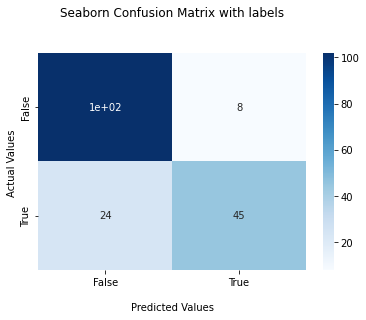

In [54]:
ax = sns.heatmap(cf_matrix_rfc, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Logistic regression
Below is the result for this model with GridSearchCV

In [48]:
print_results(calculate_metrics(y_test, pred_cv_lr), 'logistic regression gridsearchcv')

Results for lr cv
----
  Accuracy:  0.8156424581005587
  Precision: 0.8151608553265266
  Recall:    0.8156424581005587
  F1 score:  0.8120479353488635
  Mislabeled 33 out of 179




In [60]:
cf_matrix_lr = confusion_matrix(y_test, pred_cv_lr)
cf_matrix_lr

array([[99, 11],
       [22, 47]], dtype=int64)

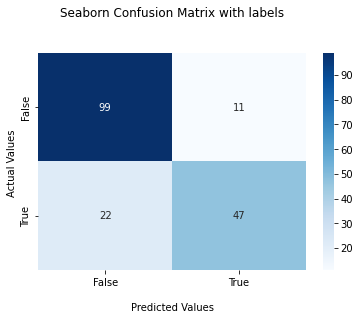

In [61]:
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Interpretation of the models & model metrics
* Accuracy
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
    * Thanks to the confusion matrices we can see that the Accuracy score may be somewhat misleading in cases like here because there are less people who survived than those who did not survive. This is reflected only after we take a look at the confusion matrices.
* Precision
$$
Precision = \frac{TP}{TP + FP}
$$
    * However if you refer to the code cells above, Accuracy and Precision have almost identical values so it seems not to be an issue in our case.
* Recall
$$
Precision = \frac{TP}{TP + FN}
$$
* F1 score<br><br>
$$
F1 = 2 * \frac{Precission * Recall}{Precission + Recall}
$$
<br><br>
All the metrics have very similar values in both models which we can once again see in the code cells below:

In [63]:
print_results(calculate_metrics(y_test, cv_pred), 'random forest clasiffier gridsearchcv')

Results for random forest clasiffier gridsearchcv
----
  Accuracy:  0.8212290502793296
  Precision: 0.8247627078659018
  Recall:    0.8212290502793296
  F1 score:  0.8155663972456657
  Mislabeled 32 out of 179




In [62]:
print_results(calculate_metrics(y_test, pred_cv_lr), 'logistic regression gridsearchcv')

Results for logistic regression gridsearchcv
----
  Accuracy:  0.8156424581005587
  Precision: 0.8151608553265266
  Recall:    0.8156424581005587
  F1 score:  0.8120479353488635
  Mislabeled 33 out of 179




## Conclusion & next steps
We can see that the performance of our Random Forest Clasiffier is very close to our Logistic Regression Model. There seems to be about 1% difference in favor of RFC.<br><br>

We could try feature engineering with our text variables like here https://www.kaggle.com/code/surajkumar88/titanic-machine-learning-from-disaster-eda.<br><br>
In our RFC model, the most significant variables were Age, Sex, and Fare. However, in this case it proved to be better to leave all the variables in our RFC model, not just the most significant ones. There are also other ways to evalueate feature importance than the one used here. It may be worth to look into those.<br><br>
We could try different parameter values for our GridSearchCV() to see if there are any improvements. We could also try Boosted ensemble methods to see if we get better performance than logistic regression and RFC.<br><br>
**Generally we have to paths for improvement. We can focus on feature engineering and playing around with our data or we can focus on hyperparameter tuning and improving our models**

## TODO:
* Review: Check the data pipeline to see if it is sound and nothing got lost along the way
* Look at the wrong predictions and see if there is any pattern